In [1]:
import requests
from urllib.request import urlretrieve
import re
from bs4 import BeautifulSoup
import time
import pandas as pd
import os
import matplotlib.pyplot as plt

### Finding urls for the song of Rihanna

In [2]:
url = 'https://www.lyrics.com/artist.php?name=Rihanna&aid=704560&o=1'
f = requests.get(url)
text = f.text

In [3]:
# Pattern for extracting the lyrics of Rihanna song
pattern = '/lyric/\d+/Rihanna/[^\>]+'
lyrics_links = re.findall(pattern, text)
list1 = []
list1.append(lyrics_links)
lyrics_links[:2]

['/lyric/21970335/Rihanna/A+Child+Is+Born"',
 '/lyric/8792914/Rihanna/A+Girl+Like+Me"']

### Creating separate text file for each song lyrics

In [4]:
for i in lyrics[0]:
    time.sleep(20)
    print(i)
    url = 'https://www.lyrics.com'+ str(i)
    # naming each file by song name 
    c = url.find('Rihanna')
    songname = url[c+8:]
    filename = songname.replace('+'," ")
    f = requests.get(url)
    e = f.text
    file = open("{}.txt".format(filename),"w",encoding="utf-8")
    file.write(e)
    file.close()

### Cleaning of the extracted files

In [5]:
# Folder containing the extracted files
file_dir = 'textdata/'
list1 = []
# list of all text files
all_txt_files = os.listdir(file_dir)

# loop over all text files and extracting only songs lyrics using Beautiful soap
for num, i in enumerate(all_txt_files):
    try:
        data = open('textdata/'+i, encoding="utf-8")
        data1 = data.read()
        print(data1)

        soup = BeautifulSoup(data1, "lxml")
        text = soup.find('pre')
        text1 = text.text
        file = open("{}_clean.txt".format(i),"w",encoding="utf-8")
        file.write(text1)
        file.close()
      except AttributeError:
          continue

### Creation of dataframe

In [6]:
df = pd.DataFrame()
# pattern for selecting words having minimum length 3
pattern = '[^\w{3,}]'

txt_files = os.listdir()
data1 = []
for s in txt_files:
    if s.endswith('.txt'):
        data1.append(s)
for i in data1:
    with open(i):
        with open(i) as infile:
            all_lyrics = infile.read()
            all_words = re.sub(pattern, " ", all_lyrics.lower())
        df = df.append(pd.DataFrame([all_words]))
df['Artist'] = 'Rihanna'
df.rename(index=str, columns={0: "lyrics"})
df.head(3)

,0,Artist
0,some girls play the game they all walk and tal...,Rihanna
0,"breathe out, breathe in american oxygen ever...",Rihanna
0,there could be a freak accident there could b...,Rihanna


### Removing repeated lyrics

In [7]:
df['Consec_lyrics'] = df[0] == df.shift()[0]
df2 = df[df['Consec_lyrics'] == False]
df2 = df2.drop(['Consec_lyrics'], axis=1)
df3 = df2[:99]

### Rihanna lyrics with all words having minimum three alphabets

In [8]:
rihanna_corpus = []
for i in df3[0]:
    s = re.findall('\w{3,}', i)
    c = ' '.join(s)
    rihanna_corpus.append(c)
rihanna_corpus[:2]

['some girls play the game they all walk and talk and they dress the same nothin new say new say don they realize that easy see right though there disguise makes wonder why when the whole world turnin left when goin right need someone let just who inside cause girl like just little different from all the rest and girl like never gonna settle for second best could boy like you that would give anything asked him take all dreams and then make true show all the reasons that you ought with girl like girl like just like possibility got trippin thinkin what could between you and still need know should keep this feelin let can wait more now the time speak your mind and show what you feel tell you wanna take chance something real cause girl like just little different from all the rest and girl like never gonna settle for second best could boy like you that would give anything asked him take all dreams and then make true show all the reasons that you ought with girl like girl like like just like

### Britney songs lyrics

In [9]:
df4 = pd.read_csv('britney')
df4.head()

,Unnamed: 0,lyrics
0,0,"Oh yeah, yeah Last night I took a walk in the..."
1,1,"All around the world, pretty girls Wipe the f..."
2,2,It's love It's love Love... get busy Everybod...
3,3,"Oh baby, baby Oh baby, baby Oh baby, baby, ho..."
4,4,"Oh, oh-oh Oh, oh, oh-oh Friends say, I'm away..."


### Britney lyrics with all words having minimum three alphabets

In [10]:
Britney_corpus = []
for i in df4['lyrics']:
    s = re.findall('\w{3,}', i)
    c = ' '.join(s)
    Britney_corpus.append(c)
Britney_corpus[:2]

['yeah yeah Last night took walk the snow Couples holding hands places Seems like everyone but love Santa can you hear signed letter that sealed with kiss sent off and just said this know exactly what want this year Santa can you hear want baby baby want someone love Someone hold Maybe maybe maybe maybe You all own big red bow Santa can you hear have been good this year And all want one thing Tell true love near all want just for Underneath Christmas tree waiting here Santa that only wish this year yeah yeah Christmas Eve just can sleep Would wrong for taking peek Cause heard that you comin town Santa can you hear really hope that you your way With something special for your sleigh please make wish come true Santa can you hear want baby baby want someone love Someone hold Maybe maybe maybe maybe all alone under the mistletoe Santa can you hear have been good this year And all want one thing Tell true love near all want just for Underneath Christmas tree waiting here Santa that only wis

In [11]:
corpus = rihanna_corpus + Britney_corpus
len(corpus)

198

In [12]:
#Creating Label
labels_C = list('R'*99)
labels_B = list('B'*99) 
labelss= labels_C + labels_B
len(labelss)

198

### Wordcloud for Rihanaa

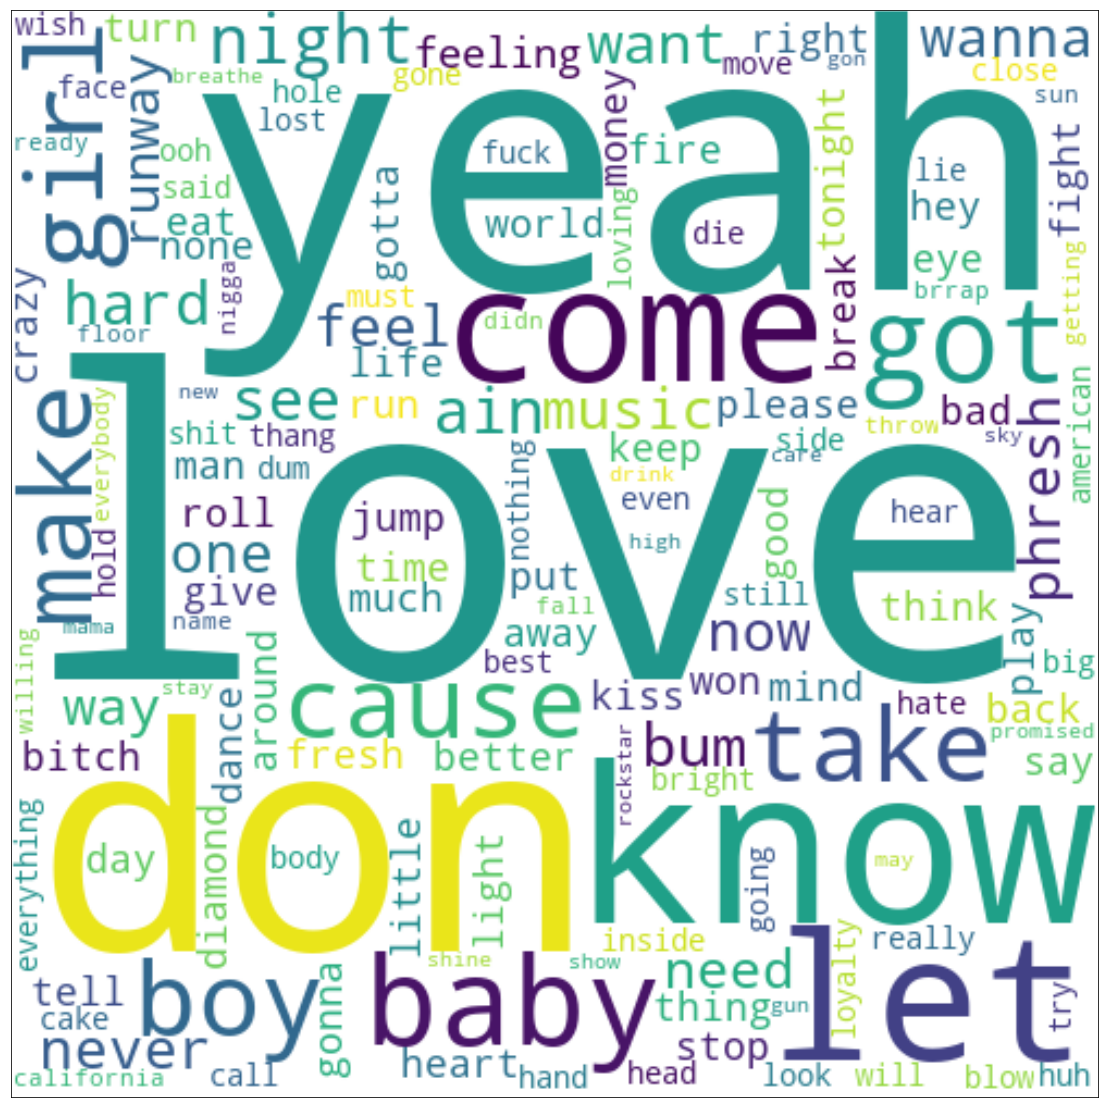

In [13]:
import numpy as np
import wordcloud
lyrics = str(rihanna_corpus)

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('Rihanna_wordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()

### Wordcloud for Britney

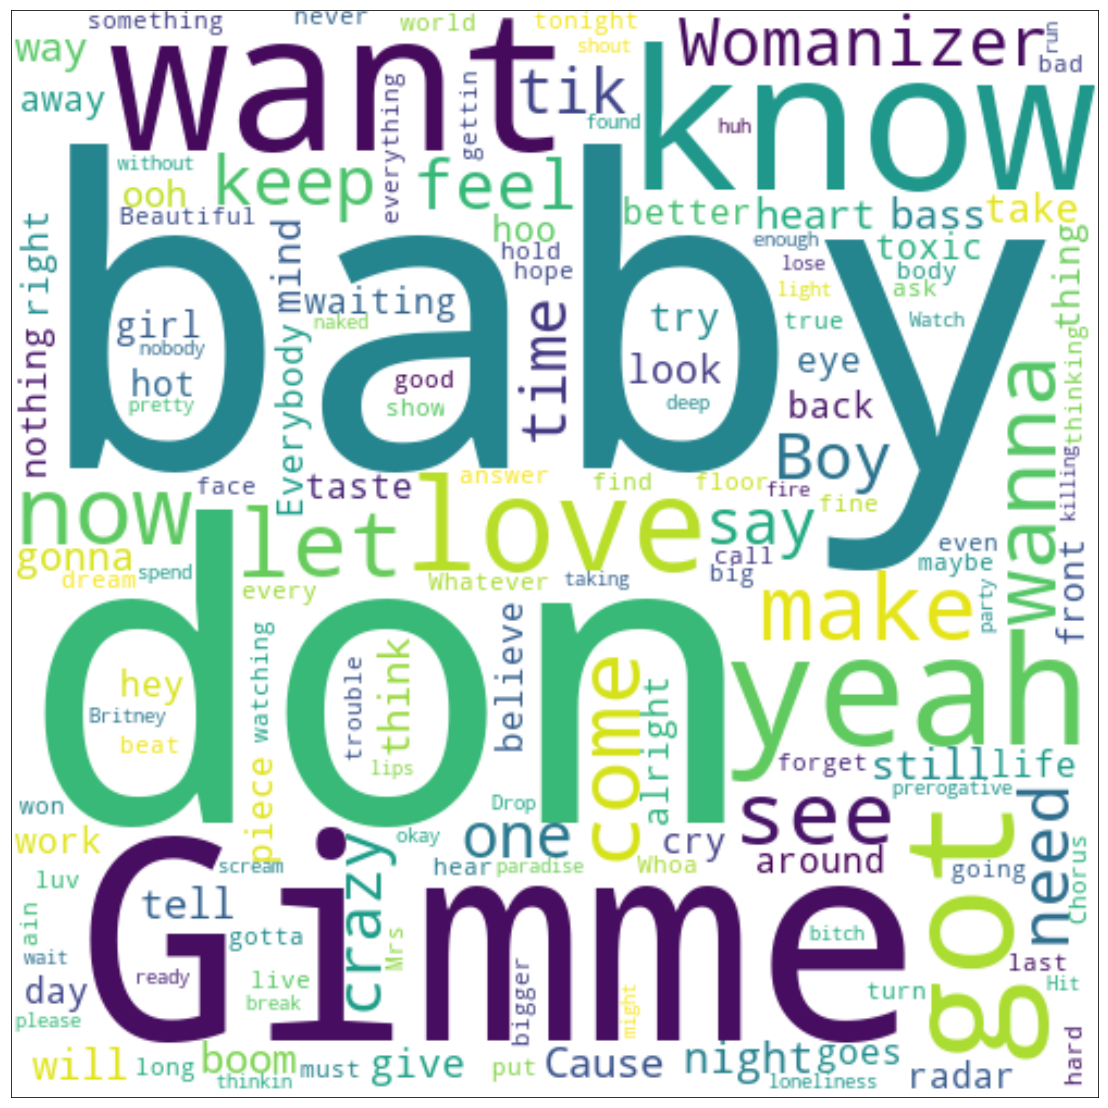

In [14]:
lyrics = str(Britney_corpus)

mask = np.zeros((500, 500, 3), np.uint8)

mask.shape

#mask[150:350,50:350,:] = 255  # masked out area

cloud = wordcloud.WordCloud(background_color="white",
                max_words=150,
                mask=mask,
                collocations=False,  # calculates frequencies
                contour_color='steelblue').generate(lyrics) # <-- lyrics is a string
                # stop words are removed!

plt.figure(figsize = (20,20))
plt.imshow(cloud, interpolation='bilinear')
plt.savefig('Rihanna_wordcloud.png')
plt.xticks([])
plt.yticks([])
plt.show()

### Top 20 most common words in Rihnna and Britney lyrics

In [15]:
songs = [rihanna_corpus,Britney_corpus]
import collections
from collections import Counter
for i,j in enumerate(songs):
    r = str(j).split()
    counts_words = Counter(r)
    word = counts_words.most_common(5)     
    print('most common words for {} are'.format(i),word) 

most common words for 0 are [('you', 1735), ('the', 1220), ('and', 667), ('that', 470), ('love', 448)]
most common words for 1 are [('you', 1554), ('the', 769), ('You', 504), ('can', 372), ('that', 336)]


### unique words in Rihanna and Britney lyrics

In [16]:
from nltk.tokenize import word_tokenize
for i, j in enumerate(songs):
    words = word_tokenize(str(j))
    unique_tokens = set(words)
    print('unique words for {} are'.format(i), len(unique_tokens))
    

unique words for 0 are 2259
unique words for 1 are 2080


### words by the length of Alphabets

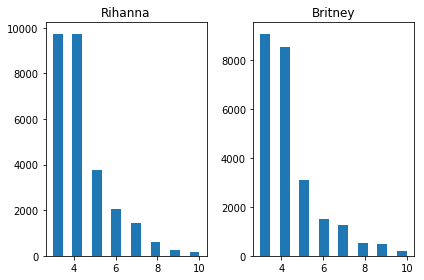

In [17]:
line_num_words_rihanna = [len(t_line.lower()) for t_line in word_tokenize(str(rihanna_corpus))]
line_num_words_britney = [len(t_line.lower()) for t_line in word_tokenize(str(Britney_corpus))]
length = [line_num_words_rihanna,line_num_words_britney]
labels = ['Rihanna','Britney']
for i in range (2):
    plt.subplot(1,2,i+1)
    plt.hist(length[i],bins=15, range=(3,10))
    plt.title(labels[i])
    plt.tight_layout()

### Removing bag of words

In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
rihanna_tokenize = word_tokenize(str(rihanna_corpus))
brittney_tokenize = word_tokenize(str(Britney_corpus)) 
rihanna_lower = [t.lower() for t in rihanna_tokenize]
brittney_lower = [t.lower() for t in brittney_tokenize]

In [19]:
rihana_no_stop = [word for word in rihanna_lower if not word in stopwords.words('english')]
britny_no_stop = [word for word in brittney_lower if not word in stopwords.words('english')]

### Top 20 most common words in Rihnna and Britney lyrics after removing bag of words

In [20]:
no_stop = [rihana_no_stop,britny_no_stop]
import collections
from collections import Counter
for i,j in enumerate(no_stop):
    r = str(j).split()
    counts_words = Counter(r)
    word = counts_words.most_common(5)     
    print('most common words for {} are'.format(i),word)

most common words for 0 are [("'love',", 452), ("'yeah',", 425), ("'like',", 403), ("'got',", 285), ("'know',", 275)]
most common words for 1 are [("'baby',", 379), ("'gim',", 305), ("'know',", 298), ("'like',", 293), ("'want',", 282)]


### Countvectorizer, tfidf and Naive Bayes

In [21]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [22]:
m = CountVectorizer(stop_words= 'english')

m.fit(corpus)

matrix = m.fit_transform(corpus)
index = list(sorted(m.vocabulary_.keys()))

df_Total = pd.DataFrame(matrix.todense(), columns = index).T.sort_values(by = 0, ascending = False)
df_Total.head()

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
like,21,0,0,3,2,10,4,0,0,4,...,0,0,28,3,0,3,1,9,1,18
girl,13,1,0,5,0,0,5,0,0,0,...,4,0,1,0,0,0,0,2,0,0
just,10,2,0,2,1,1,2,1,1,3,...,0,5,12,0,1,0,1,1,0,1
mirror,6,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wish,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tf = TfidfTransformer()
vec = tf.fit_transform(matrix)
vec.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
X= vec
y = labelss

In [26]:
mc = MultinomialNB()
mc.fit(X, y)

mc.score(X, y)

0.98989898989899

### test dataset

In [27]:
test = rihanna_corpus[80:95] + Britney_corpus[120:135]

In [28]:
test_wordd2vec = m.transform(test)
test_vec = tf.transform(test_wordd2vec)


In [29]:
mc.predict(test_vec)

array(['B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R'], dtype='<U1')

In [30]:
mc.predict_proba(test_vec)

array([[0.5       , 0.5       ],
       [0.4650654 , 0.5349346 ],
       [0.29155663, 0.70844337],
       [0.24414266, 0.75585734],
       [0.28657583, 0.71342417],
       [0.27738809, 0.72261191],
       [0.37245702, 0.62754298],
       [0.39903816, 0.60096184],
       [0.20369598, 0.79630402],
       [0.41319841, 0.58680159],
       [0.3333609 , 0.6666391 ],
       [0.44928984, 0.55071016],
       [0.44891604, 0.55108396],
       [0.31684972, 0.68315028],
       [0.35929639, 0.64070361]])

### Features most disciminating

In [31]:
one = mc.feature_log_prob_[0]
two = mc.feature_log_prob_[1]

diff = one - two

In [32]:
import pandas as pd

df = pd.DataFrame(diff, index= list(sorted(m.vocabulary_.keys())) ).sort_values(by=0, ascending=False)

In [33]:
df

,0
toxic,1.496033
gimme,1.458625
womanizer,1.338644
chorus,1.051119
believe,1.025853
taste,1.019926
loneliness,0.957948
prerogative,0.860351
comes,0.817161
alright,0.798042
